## HOUSING DATA ANALYSIS

### Folder Structure of the project

housing-data-analysis-pro-3/
├── __pycache__/
├── assets/
│   └── images/
│       ├── bivariate/
│       ├── customer_prefs/
│       ├── feature_engineering/
│       ├── market_trends/
│       ├── multivariate/
│       └── univariate/
├── data/
│   ├── $housing_data.xlsx
│   ├── housing_data.csv
│   └── housing_data_dict.csv
├── notebooks/
│   └── housing_data_eda.ipynb
├── housing_feature_dict.py
├── README.md
└── requirements.txt


### Pre-EDA work - Load data and make analysis based on the new created sheet
#### STEP 1: Load the data and convert the dataset to excel(xlsx) file from CSV format file
Here we will need an excel sheet of the same dataset. We will be converting CSV file to Excel sheet(xlsx) to work easily without format issue in coming analysis. 

Loading the housing dataset using pandas. This will allow us to manipulate and analyze the data efficiently.
Import Libraries and Load Data - loading the housing dataset using pandas.

In [1266]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlsxwriter
from openpyxl import load_workbook
from openpyxl.styles import Alignment, Font, PatternFill, Border, Side
from openpyxl.drawing.image import Image as XLImage
from openpyxl.utils import get_column_letter
import sys
sys.path.append("../")
from housing_feature_dict import feature_dict

# 📁 File paths+
CSV_PATH = '../data/housing_data.csv'
XLSX_PATH = '../data/housing_data.xlsx'
ASSETS_UNI_IMG_PATH = '../assets/images/univariate'
ASSETS_BI_IMG_PATH = '../assets/images/bivariate'
ASSETS_MUL_IMG_PATH = '../assets/images/multivariate'
ASSETS_FE_IMG_PATH = '../assets/images/feature_engineering'
MT_IMG_DIR = '../assets/images/market_trends'
CP_IMG_DIR = '../assets/images/customer_prefs'


# Sheet names
SHEET_HOUSING = 'Housing Data'
SHEET_MISSING = 'Missing Feature Analysis'
SHEET_DICTIONARY = 'Data Dictionary'

# Header colors
COLOR_TEAL = '#00796B'
COLOR_NAVY = '#1F4E78'

# Chart settings
CHART_TITLE = 'Missing Data by Feature'
CHART_X_AXIS = 'Percentage (%)'
CHART_Y_AXIS = 'Feature'

# Chart Names
PAIR_PLOT_IMG = 'pairplot_matrix.png'
HEATMAP_IMG = 'correlation_heatmap.png'


# Threshold for missing data visualization
DROP_THRESHOLD = 0.50
MEAN_THRESHOLD = (0.05, 0.10)
MEDIAN_THRESHOLD = 0.30

# Load the dataset
df = pd.read_csv(CSV_PATH, index_col=0) # Assuming first column is an index)

output_file = XLSX_PATH

# Create Excel writer with XlsxWriter engine
writer = pd.ExcelWriter(output_file, engine='xlsxwriter')

# Write DataFrame to Excel
df.to_excel(writer, sheet_name=SHEET_HOUSING, index=True)

# Optional: Apply styling (header format, freeze panes)
workbook = writer.book
worksheet = writer.sheets[SHEET_HOUSING]

# Define header format for Housing Data (Teal)
header_format = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'top',
    'align': 'center',
    'font_color': "#ffffff",
    'bg_color': COLOR_TEAL,
    'border': 1
})


centered_format = workbook.add_format({
    'align': 'center',
    'valign': 'vcenter',
    'border': 1
})

print("df columns:", df.columns)


df columns: Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pave

### Preview Data Set

Here we will be using head() and tail() methods to preview the data. These functions help us in inspecting the first and last few rows of the dataset.

In [1267]:
# View rows from top/starting of the dataset
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [1268]:
# View rows from bottom/end of the dataset
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,SC60,RL,62,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Aug,2007,WD,Normal,175000
1456,SC20,RL,85,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,MnPrv,No,0,Feb,2010,WD,Normal,210000
1457,SC70,RL,66,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,GdPrv,Shed,2500,May,2010,WD,Normal,266500
1458,SC20,RL,68,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Apr,2010,WD,Normal,142125
1459,SC20,RL,75,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,No,No,No,0,Jun,2008,WD,Normal,147500


### Dataset Summary before data cleaning

The `info()` method reveals:
- Column names
- Data types
- Non-null counts



In [1269]:
# Get the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   int64  
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

Remove first column of incremental values from 0 to last of the dataset, and then adding a fresh feature/column `UnitId` at its place which will start from 1 instead of 0, which is more meaningful.

In [1270]:
# Apply header format and auto-adjust column widths
worksheet.write(0, 0, 'UnitId', header_format)
worksheet.set_column(1, 0, len('UnitId') + 2)


for col_num, column_name in enumerate(df.columns):
    worksheet.write(0, col_num + 1, column_name, header_format)
    max_len = max(df[column_name].astype(str).map(len).max(), len(column_name)) + 2
    worksheet.set_column(col_num + 1, col_num + 1, max_len)
    
for row_num in range(1, len(df) + 1):
    worksheet.write(row_num, 0, row_num, centered_format)

worksheet.freeze_panes(1, 1)

### Data Dictionary 
Adding the data dictionary to for Features used in `Housing Data`

In [1271]:
# Build Data Dictionary DataFrame
data_dict = pd.DataFrame({
    'Column': df.columns,
    'Description': [feature_dict.get(col, '') for col in df.columns],
    'DataType': df.dtypes.values,
    'MissingValues': df.isnull().sum().values
})

header_dict = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'vcenter',
    'align': 'center',
    'font_color': '#ffffff',
    'bg_color': '#A35920',
    'border': 1
})

# Helper function to style headers
def style_headers(worksheet, dataframe, header_format, freeze_row=True, freeze_col=False):
    for col_num, column_name in enumerate(dataframe.columns):
        worksheet.write(0, col_num, column_name, header_format)
        max_len = max(dataframe[column_name].astype(str).map(len).max(), len(column_name)) + 2
        worksheet.set_column(col_num, col_num, max_len)
    row = 1 if freeze_row else 0
    col = 1 if freeze_col else 0
    
# Write to Excel
data_dict.to_excel(writer, sheet_name=SHEET_DICTIONARY, index=False)
# Access workbook and worksheet
worksheet = writer.sheets[SHEET_DICTIONARY]
style_headers(worksheet, data_dict, header_dict, freeze_row=True, freeze_col=False)

# Apply header format and auto-adjust column widths
for col_num, column_name in enumerate(data_dict.columns):
    worksheet.write(0, col_num, column_name, header_dict)
    max_len = max(data_dict[column_name].astype(str).map(len).max(), len(column_name)) + 2
    worksheet.set_column(col_num, col_num, max_len)
    
print(f"Data dictionary written to {output_file}")
print(data_dict)


# Find the row to start appending — just after last data_dict row + 2 for spacing
start_row = len(data_dict) + 3
# Write the MSSubClass title/description header
worksheet.write(start_row, 0, "MSSubClass", header_dict)
worksheet.write(start_row, 1, "Dwelling Type", header_dict)

# Define the MSSubClass detailed codes and descriptions as a list of tuples
ms_subclass_details = [
    (20, "1-STORY 1946 & NEWER ALL STYLES"),
    (30, "1-STORY 1945 & OLDER"),
    (40, "1-STORY W/FINISHED ATTIC ALL AGES"),
    (45, "1-1/2 STORY - UNFINISHED ALL AGES"),
    (50, "1-1/2 STORY FINISHED ALL AGES"),
    (60, "2-STORY 1946 & NEWER"),
    (70, "2-STORY 1945 & OLDER"),
    (75, "2-1/2 STORY ALL AGES"),
    (80, "SPLIT OR MULTI-LEVEL"),
    (85, "SPLIT FOYER"),
    (90, "DUPLEX - ALL STYLES AND AGES"),
    (120, "1-STORY PUD (Planned Unit Development) - 1946 & NEWER"),
    (150, "1-1/2 STORY PUD - ALL AGES"),
    (160, "2-STORY PUD - 1946 & NEWER"),
    (180, "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER"),
    (190, "2 FAMILY CONVERSION - ALL STYLES AND AGES")
]

# Write each code and description in two adjacent columns
for i, (code, desc) in enumerate(ms_subclass_details, start=start_row + 1):
    worksheet.write(i, 0, code, centered_format)
    worksheet.write(i, 1, desc, centered_format)

# Optionally, adjust column widths for better readability
worksheet.set_column(0, 0, 8)   # Code column
worksheet.set_column(1, 1, 50)  # Description column

# Continue appending after MSSubClass
current_row = i + 2   # leave a blank row after last entry

# Helper to write a section
def write_section(worksheet, start_row, title1, title2, entries):
    worksheet.write(start_row, 0, title1, header_dict)
    worksheet.write(start_row, 1, title2, header_dict)
    for j, (code, desc) in enumerate(entries, start=start_row+1):
        worksheet.write(j, 0, code, centered_format)
        worksheet.write(j, 1, desc, centered_format)
    worksheet.set_column(0, 0, 15)
    worksheet.set_column(1, 1, 60)
    return j + 2  # next available row with spacing

# === MSZoning ===
mszoning_details = [
    ("A", "Agriculture"),
    ("C", "Commercial"),
    ("FV", "Floating Village Residential"),
    ("I", "Industrial"),
    ("RH", "Residential High-Density"),
    ("RL", "Residential Low-Density"),
    ("RP", "Residential Low-Density Park"),
    ("RM", "Residential Medium Density"),
]
current_row = write_section(worksheet, current_row, "MSZoning", "Zoning Classification", mszoning_details)

# === Street ===
street_details = [
    ("Grvl", "Gravel"),
    ("Pave", "Paved"),
]
current_row = write_section(worksheet, current_row, "Street", "Type of road access", street_details)

# === Alley ===
alley_details = [
    ("Grvl", "Gravel"),
    ("Pave", "Paved"),
    ("NA", "No alley access"),
]
current_row = write_section(worksheet, current_row, "Alley", "Type of alley access", alley_details)

# === LotShape ===
lotshape_details = [
    ("Reg", "Regular"),
    ("IR1", "Slightly irregular"),
    ("IR2", "Moderately irregular"),
    ("IR3", "Irregular"),
]
current_row = write_section(worksheet, current_row, "LotShape", "General shape of property", lotshape_details)

# === LandContour ===
landcontour_details = [
    ("Lvl", "Near Flat/Level"),
    ("Bnk", "Banked - rise from street grade"),
    ("HLS", "Hillside slope"),
    ("Low", "Depression"),
]
current_row = write_section(worksheet, current_row, "LandContour", "Flatness of property", landcontour_details)

# === Utilities ===
utilities_details = [
    ("AllPub", "All public Utilities (E,G,W,&S)"),
    ("NoSewr", "Electricity, Gas, Water (Septic Tank)"),
    ("NoSeWa", "Electricity and Gas Only"),
    ("ELO", "Electricity only"),
]
current_row = write_section(worksheet, current_row, "Utilities", "Type of utilities available", utilities_details)

# === LotConfig ===
lotconfig_details = [
    ("Inside", "Inside lot"),
    ("Corner", "Corner lot"),
    ("CulDSac", "Cul-de-sac"),
    ("FR2", "Frontage on 2 sides"),
    ("FR3", "Frontage on 3 sides"),
]
current_row = write_section(worksheet, current_row, "LotConfig", "Lot configuration", lotconfig_details)

# === LandSlope ===
landslope_details = [
    ("Gtl", "Gentle slope"),
    ("Mod", "Moderate slope"),
    ("Sev", "Severe slope"),
]
current_row = write_section(worksheet, current_row, "LandSlope", "Slope of property", landslope_details)

# === Neighborhood ===
neighborhood_details = [
    ("Blmngtn", "Bloomington Heights"),
    ("Blueste", "Bluestem"),
    ("BrDale", "Briardale"),
    ("BrkSide", "Brookside"),
    ("ClearCr", "Clear Creek"),
    ("CollgCr", "College Creek"),
    ("Crawfor", "Crawford"),
    ("Edwards", "Edwards"),
    ("Gilbert", "Gilbert"),
    ("IDOTRR", "Iowa DOT and Rail Road"),
    ("MeadowV", "Meadow Village"),
    ("Mitchel", "Mitchell"),
    ("Names", "North Ames"),
    ("NoRidge", "Northridge"),
    ("NPkVill", "Northpark Villa"),
    ("NridgHt", "Northridge Heights"),
    ("NWAmes", "Northwest Ames"),
    ("OldTown", "Old Town"),
    ("SWISU", "South & West of ISU"),
    ("Sawyer", "Sawyer"),
    ("SawyerW", "Sawyer West"),
    ("Somerst", "Somerset"),
    ("StoneBr", "Stone Brook"),
    ("Timber", "Timberland"),
    ("Veenker", "Veenker"),
]
current_row = write_section(worksheet, current_row, "Neighborhood", "Physical location", neighborhood_details)

# === Condition1 ===
condition1_details = [
    ("Artery", "Adjacent to arterial street"),
    ("Feedr", "Adjacent to feeder street"),
    ("Norm", "Normal"),
    ("RRNn", "Within 200' of N-S Railroad"),
    ("RRAn", "Adjacent to N-S Railroad"),
    ("PosN", "Near positive off-site feature"),
    ("PosA", "Adjacent to positive off-site feature"),
    ("RRNe", "Within 200' of E-W Railroad"),
    ("RRAe", "Adjacent to E-W Railroad"),
]
current_row = write_section(worksheet, current_row, "Condition1", "Proximity to conditions", condition1_details)

# === Condition2 ===
condition2_details = condition1_details  # same codes
current_row = write_section(worksheet, current_row, "Condition2", "Secondary proximity", condition2_details)

# === BldgType ===
bldgtype_details = [
    ("1Fam", "Single-family Detached"),
    ("2FmCon", "Two-family Conversion"),
    ("Duplx", "Duplex"),
    ("TwnhsE", "Townhouse End Unit"),
    ("TwnhsI", "Townhouse Inside Unit"),
]
current_row = write_section(worksheet, current_row, "BldgType", "Type of dwelling", bldgtype_details)

# === HouseStyle ===
housestyle_details = [
    ("1Story", "One story"),
    ("1.5Fin", "1.5 story: 2nd level finished"),
    ("1.5Unf", "1.5 story: 2nd level unfinished"),
    ("2Story", "Two-story"),
    ("2.5Fin", "2.5 story: 2nd level finished"),
    ("2.5Unf", "2.5 story: 2nd level unfinished"),
    ("SFoyer", "Split Foyer"),
    ("SLvl", "Split Level"),
]
current_row = write_section(worksheet, current_row, "HouseStyle", "Style of dwelling", housestyle_details)

# === OverallQual ===
overallqual_details = [(str(i), desc) for i, desc in [
    (10, "Very Excellent"), (9, "Excellent"), (8, "Very Good"), (7, "Good"),
    (6, "Above Average"), (5, "Average"), (4, "Below Average"),
    (3, "Fair"), (2, "Poor"), (1, "Very Poor")
]]
current_row = write_section(worksheet, current_row, "OverallQual", "Overall material/finish", overallqual_details)

# === OverallCond ===
overallcond_details = overallqual_details
current_row = write_section(worksheet, current_row, "OverallCond", "Overall condition", overallcond_details)

# === RoofStyle ===
roofstyle_details = [
    ("Flat", "Flat"),
    ("Gable", "Gable"),
    ("Gambrel", "Gabrel (Barn)"),
    ("Hip", "Hip"),
    ("Mansard", "Mansard"),
    ("Shed", "Shed"),
]
current_row = write_section(worksheet, current_row, "RoofStyle", "Type of roof", roofstyle_details)

# === RoofMatl ===
roofmatl_details = [
    ("ClyTile", "Clay or Tile"),
    ("CompShg", "Standard (Composite) Shingle"),
    ("Membran", "Membrane"),
    ("Metal", "Metal"),
    ("Roll", "Roll"),
    ("Tar&Grv", "Gravel & Tar"),
    ("WdShake", "Wood Shakes"),
    ("WdShngl", "Wood Shingles"),
]
current_row = write_section(worksheet, current_row, "RoofMatl", "Roof material", roofmatl_details)

# === Exterior1st ===
exterior1st_details = [
    ("AsbShng", "Asbestos Shingles"),
    ("AsphShn", "Asphalt Shingles"),
    ("BrkComm", "Brick Common"),
    ("BrkFace", "Brick Face"),
    ("CBlock", "Cinder Block"),
    ("CemntBd", "Cement Board"),
    ("HdBoard", "Hard Board"),
    ("ImStucc", "Imitation Stucco"),
    ("MetalSd", "Metal Siding"),
    ("Other", "Other"),
    ("Plywood", "Plywood"),
    ("PreCast", "PreCast"),
    ("Stone", "Stone"),
    ("Stucco", "Stucco"),
    ("VinylSd", "Vinyl Siding"),
    ("Wd Sdng", "Wood Siding"),
    ("WdShing", "Wood Shingles"),
]
current_row = write_section(worksheet, current_row, "Exterior1st", "Exterior covering", exterior1st_details)

# === Exterior2nd ===
exterior2nd_details = exterior1st_details
current_row = write_section(worksheet, current_row, "Exterior2nd", "Secondary exterior covering", exterior2nd_details)

# === MasVnrType ===
masvnrtype_details = [
    ("BrkCmn", "Brick Common"),
    ("BrkFace", "Brick Face"),
    ("CBlock", "Cinder Block"),
    ("None", "None"),
    ("Stone", "Stone"),
]
current_row = write_section(worksheet, current_row, "MasVnrType", "Masonry veneer type", masvnrtype_details)

# === ExterQual ===
exterqual_details = [
    ("Ex", "Excellent"),
    ("Gd", "Good"),
    ("TA", "Average/Typical"),
    ("Fa", "Fair"),
    ("Po", "Poor"),
]
current_row = write_section(worksheet, current_row, "ExterQual", "Exterior material quality", exterqual_details)

# === ExterCond ===
extercond_details = exterqual_details
current_row = write_section(worksheet, current_row, "ExterCond", "Exterior material condition", extercond_details)

# === Foundation ===
foundation_details = [
    ("BrkTil", "Brick & Tile"),
    ("CBlock", "Cinder Block"),
    ("PConc", "Poured Concrete"),
    ("Slab", "Slab"),
    ("Stone", "Stone"),
    ("Wood", "Wood"),
]
current_row = write_section(worksheet, current_row, "Foundation", "Type of foundation", foundation_details)

# === BsmtQual ===
bsmtqual_details = [
    ("Ex", "Excellent (100+ inches)"),
    ("Gd", "Good (90-99 inches)"),
    ("TA", "Typical (80-89 inches)"),
    ("Fa", "Fair (70-79 inches)"),
    ("Po", "Poor (<70 inches)"),
    ("NA", "No Basement"),
]
current_row = write_section(worksheet, current_row, "BsmtQual", "Basement height", bsmtqual_details)

# === BsmtCond ===
bsmtcond_details = [
    ("Ex", "Excellent"),
    ("Gd", "Good"),
    ("TA", "Typical - slight dampness allowed"),
    ("Fa", "Fair - dampness or some cracking"),
    ("Po", "Poor - severe cracking/settling"),
    ("NA", "No Basement"),
]
current_row = write_section(worksheet, current_row, "BsmtCond", "Basement condition", bsmtcond_details)

# === BsmtExposure ===
bsmtexposure_details = [
    ("Gd", "Good Exposure"),
    ("Av", "Average Exposure"),
    ("Mn", "Minimum Exposure"),
    ("No", "No Exposure"),
    ("NA", "No Basement"),
]
current_row = write_section(worksheet, current_row, "BsmtExposure", "Basement exposure", bsmtexposure_details)

# === BsmtFinType1 ===
bsmtfintype1_details = [
    ("GLQ", "Good Living Quarters"),
    ("ALQ", "Average Living Quarters"),
    ("BLQ", "Below Average Living Quarters"),
    ("Rec", "Average Rec Room"),
    ("LwQ", "Low Quality"),
    ("Unf", "Unfinished"),
    ("NA", "No Basement"),
]
current_row = write_section(worksheet, current_row, "BsmtFinType1", "Basement finished area type 1", bsmtfintype1_details)

# === BsmtFinType2 ===
bsmtfintype2_details = bsmtfintype1_details
current_row = write_section(worksheet, current_row, "BsmtFinType2", "Basement finished area type 2", bsmtfintype2_details)

# === Heating ===
heating_details = [
    ("Floor", "Floor Furnace"),
    ("GasA", "Gas forced warm air furnace"),
    ("GasW", "Gas hot water or steam heat"),
    ("Grav", "Gravity furnace"),
    ("OthW", "Hot water/steam heat other than gas"),
    ("Wall", "Wall furnace"),
]
current_row = write_section(worksheet, current_row, "Heating", "Type of heating", heating_details)

# === HeatingQC ===
heatingqc_details = [
    ("Ex", "Excellent"),
    ("Gd", "Good"),
    ("TA", "Average/Typical"),
    ("Fa", "Fair"),
    ("Po", "Poor"),
]
current_row = write_section(worksheet, current_row, "HeatingQC", "Heating quality and condition", heatingqc_details)

# === CentralAir ===
centralair_details = [
    ("Y", "Yes"),
    ("N", "No"),
]
current_row = write_section(worksheet, current_row, "CentralAir", "Central air conditioning", centralair_details)

# === Electrical ===
electrical_details = [
    ("SBrkr", "Standard Circuit Breakers & Romex"),
    ("FuseA", "Fuse Box >60 AMP, Romex wiring (Average)"),
    ("FuseF", "60 AMP Fuse Box, mostly Romex (Fair)"),
    ("FuseP", "60 AMP Fuse Box, knob & tube wiring (Poor)"),
    ("Mix", "Mixed"),
]
current_row = write_section(worksheet, current_row, "Electrical", "Electrical system", electrical_details)

# === KitchenQual ===
kitchenqual_details = [
    ("Ex", "Excellent"),
    ("Gd", "Good"),
    ("TA", "Typical/Average"),
    ("Fa", "Fair"),
    ("Po", "Poor"),
]
current_row = write_section(worksheet, current_row, "KitchenQual", "Kitchen quality", kitchenqual_details)

# === Functional ===
functional_details = [
    ("Typ", "Typical Functionality"),
    ("Min1", "Minor Deductions 1"),
    ("Min2", "Minor Deductions 2"),
    ("Mod", "Moderate Deductions"),
    ("Maj1", "Major Deductions 1"),
    ("Maj2", "Major Deductions 2"),
    ("Sev", "Severely Damaged"),
    ("Sal", "Salvage only"),
]
current_row = write_section(worksheet, current_row, "Functional", "Home functionality", functional_details)

# === FireplaceQu ===
fireplacequ_details = [
    ("Ex", "Excellent"),
    ("Gd", "Good"),
    ("TA", "Average"),
    ("Fa", "Fair"),
    ("Po", "Poor"),
    ("NA", "No Fireplace"),
]
current_row = write_section(worksheet, current_row, "FireplaceQu", "Fireplace quality", fireplacequ_details)

# === GarageType ===
garagetype_details = [
    ("2Types", "More than one type of garage"),
    ("Attchd", "Attached to home"),
    ("Basment", "Basement Garage"),
    ("BuiltIn", "Built-In"),
    ("CarPort", "Car Port"),
    ("Detchd", "Detached"),
    ("NA", "No Garage"),
]
current_row = write_section(worksheet, current_row, "GarageType", "Garage location", garagetype_details)

# === GarageFinish ===
garagefinish_details = [
    ("Fin", "Finished"),
    ("RFn", "Rough Finished"),
    ("Unf", "Unfinished"),
    ("NA", "No Garage"),
]
current_row = write_section(worksheet, current_row, "GarageFinish", "Garage interior finish", garagefinish_details)

# === GarageQual ===
garagequal_details = [
    ("Ex", "Excellent"),
    ("Gd", "Good"),
    ("TA", "Typical/Average"),
    ("Fa", "Fair"),
    ("Po", "Poor"),
    ("NA", "No Garage"),
]
current_row = write_section(worksheet, current_row, "GarageQual", "Garage quality", garagequal_details)

# === GarageCond ===
garagecond_details = garagequal_details
current_row = write_section(worksheet, current_row, "GarageCond", "Garage condition", garagecond_details)

# === PavedDrive ===
paveddrive_details = [
    ("Y", "Paved"),
    ("P", "Partial Pavement"),
    ("N", "Dirt/Gravel"),
]
current_row = write_section(worksheet, current_row, "PavedDrive", "Paved driveway", paveddrive_details)

# === Fence ===
fence_details = [
    ("GdPrv", "Good Privacy"),
    ("MnPrv", "Minimum Privacy"),
    ("GdWo", "Good Wood"),
    ("MnWw", "Minimum Wood/Wire"),
    ("NA", "No Fence"),
]
current_row = write_section(worksheet, current_row, "Fence", "Fence quality", fence_details)

# === PoolQC ===
poolqc_details = [
    ("Ex", "Excellent"),
    ("Gd", "Good"),
    ("TA", "Average/Typical"),
    ("Fa", "Fair"),
    ("NA", "No Pool"),
]
current_row = write_section(worksheet, current_row, "PoolQC", "Pool quality", poolqc_details)

# === MiscFeature ===
miscfeature_details = [
    ("Elev", "Elevator"),
    ("Gar2", "2nd Garage"),
    ("Othr", "Other"),
    ("Shed", "Shed (over 100 SF)"),
    ("TenC", "Tennis Court"),
    ("NA", "None"),
]
current_row = write_section(worksheet, current_row, "MiscFeature", "Miscellaneous feature", miscfeature_details)

# === SaleType ===
saletype_details = [
    ("WD", "Warranty Deed - Conventional"),
    ("CWD", "Warranty Deed - Cash"),
    ("VWD", "Warranty Deed - VA Loan"),
    ("New", "Home just constructed and sold"),
    ("COD", "Court Officer Deed/Estate"),
    ("Con", "Contract 15% Down payment regular terms"),
    ("ConLw", "Contract Low Down payment and low interest"),
    ("ConLI", "Contract Low Interest"),
    ("ConLD", "Contract Low Down"),
    ("Oth", "Other"),
]
current_row = write_section(worksheet, current_row, "SaleType", "Type of sale", saletype_details)

# === SaleCondition ===
salecondition_details = [
    ("Normal", "Normal Sale"),
    ("Abnorml", "Abnormal Sale - trade, foreclosure, short sale"),
    ("AdjLand", "Adjoining Land Purchase"),
    ("Alloca", "Allocation - linked properties"),
    ("Family", "Sale between family members"),
    ("Partial", "Home not completed when last assessed"),
]
current_row = write_section(worksheet, current_row, "SaleCondition", "Condition of sale", salecondition_details)

# === Save workbook ===
writer._save()  # if using pd.ExcelWriter with xlsxwriter
print(f"Data Dictionary sheet '{SHEET_DICTIONARY}' completed and saved to {output_file}")



Data dictionary written to ../data/housing_data.xlsx
           Column                                        Description DataType  \
0      MSSubClass  Identifies the type of dwelling involved in th...   object   
1        MSZoning          General zoning classification of the sale   object   
2     LotFrontage    Linear feet of street connected to the property    int64   
3         LotArea                            Lot size in square feet    int64   
4          Street                    Type of road access to property   object   
..            ...                                                ...      ...   
75         MoSold                                         Month sold   object   
76         YrSold                                          Year sold    int64   
77       SaleType                                       Type of sale   object   
78  SaleCondition                                  Condition of sale   object   
79      SalePrice                                       

#### Checking missing values

Using `isnull().sum()` will let us know the missing values which we can utilize in preparing for the clean data set.

In [1272]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [1273]:
# Count missing values in each column
missing_counts = df.isnull().sum()
missing_percent = df.isnull().mean() * 100

# Display columns with missing data
print(missing_counts[missing_counts > 0])
print(missing_percent[missing_percent > 0])

Alley          1369
MasVnrType      872
Electrical        1
GarageYrBlt      81
dtype: int64
Alley          93.767123
MasVnrType     59.726027
Electrical      0.068493
GarageYrBlt     5.547945
dtype: float64


### Missing Value Analysis
Here we will see a report that adds up in the `housing_data.xlsx` workbook as a sheet with name `Missing Feature Analysis`

In [1274]:
# Filter only columns with missing data
missing_df = pd.DataFrame({
    'Feature': missing_counts[missing_counts > 0].index,
    'MissingCount': missing_counts[missing_counts > 0].values,
    'MissingPercentage': missing_percent[missing_percent > 0].values
}).sort_values(by='MissingPercentage', ascending=False)

header_missing = workbook.add_format({
    'bold': True,
    'text_wrap': True,
    'valign': 'top',
    'align': 'center',
    'font_color': '#ffffff',
    'bg_color': COLOR_NAVY,
    'border': 1
})

# Helper function to style headers
def style_headers(worksheet, dataframe, header_format, freeze_row=True, freeze_col=False):
    for col_num, column_name in enumerate(dataframe.columns):
        worksheet.write(0, col_num, column_name, header_format)
        max_len = max(dataframe[column_name].astype(str).map(len).max(), len(column_name)) + 2
        worksheet.set_column(col_num, col_num, max_len)
    row = 1 if freeze_row else 0
    col = 1 if freeze_col else 0
    worksheet.freeze_panes(row, col)

    

# Sheet 3: Missing Feature Analysis
missing_df.to_excel(writer, sheet_name=SHEET_MISSING, index=False)
worksheet = writer.sheets[SHEET_MISSING]
style_headers(worksheet, missing_df, header_missing, freeze_row=True, freeze_col=False)

# ✅ Add horizontal bar chart to Missing Feature Analysis
chart = workbook.add_chart({'type': 'bar'})
chart.add_series({
    'categories': [SHEET_MISSING, 1, 0, len(missing_df), 0],  # Feature names
    'values':     [SHEET_MISSING, 1, 2, len(missing_df), 2],  # MissingPercentage
    'name':       'Missing Percentage'
})
chart.set_title({'name': CHART_TITLE})
chart.set_x_axis({'name': CHART_X_AXIS})
chart.set_y_axis({'name': CHART_Y_AXIS})
chart.set_style(11)
worksheet.insert_chart('E2', chart)
writer.close()

c:\Users\Aishwarya Kr Singh\AppData\Local\Programs\Python\Python313\Lib\site-packages\xlsxwriter\workbook.py:404: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


## Data Cleaning with Pandas
Removing the duplicate entries 

In [1275]:
# df_original = df.copy()
# df_cleaned = df_original.drop_duplicates()
# removed_duplicates = df_original[~df_original.index.isin(df_cleaned.index)]
# duplicates = df[df.duplicated(keep=False)]
# num_removed = len(df_original) - len(df_cleaned)
# print(f"{num_removed} duplicate rows removed.")
df = df.drop_duplicates()

##### Clean the dataset & Handling Outliers 
This ensures data quality by eliminating missing values, removing, and addressing any anomalies or inconsistencies in the dataset.  

In [1276]:
# === Missing value handler ===
def handle_missing_values(df):
    df_cleaned = df.copy()
    missing_percent = df_cleaned.isnull().mean()
    dropped_cols = []

    for col in df_cleaned.columns:
        pct = missing_percent[col]

        if pct >= DROP_THRESHOLD:
            df_cleaned.drop(columns=[col], inplace=True)
            dropped_cols.append(col)
            print(f"Dropped '{col}' — missing {pct:.2%}")

        elif MEAN_THRESHOLD[0] <= pct <= MEAN_THRESHOLD[1]:
            if pd.api.types.is_numeric_dtype(df_cleaned[col]):
                mean_val = df_cleaned[col].mean()
                df_cleaned[col] = df_cleaned[col].fillna(mean_val)
                print(f"Filled '{col}' with mean ({mean_val:.2f}) — missing {pct:.2%}")

        elif abs(pct - MEDIAN_THRESHOLD) < 0.05:
            if pd.api.types.is_numeric_dtype(df_cleaned[col]):
                median_val = df_cleaned[col].median()
                df_cleaned[col] = df_cleaned[col].fillna(median_val)
                print(f"Filled '{col}' with median ({median_val:.2f}) — missing {pct:.2%}")

    return df_cleaned, dropped_cols, missing_percent

# === Outlier handler ===
def handle_outliers(df, method="IQR", z_thresh=3):
    df_cleaned = df.copy()
    outlier_log = {}

    for col in df_cleaned.select_dtypes(include=["float64", "int64"]).columns:
        series = df_cleaned[col]

        if method == "IQR":
            Q1, Q3 = series.quantile([0.25, 0.75])
            IQR = Q3 - Q1
            lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
            mask = (series < lower) | (series > upper)

        elif method == "zscore":
            mean, std = series.mean(), series.std()
            lower, upper = mean - z_thresh * std, mean + z_thresh * std
            mask = (abs((series - mean) / std) > z_thresh)

        else:
            continue

        outlier_count = mask.sum()
        if outlier_count > 0:
            outlier_log[col] = int(outlier_count)

            if pd.api.types.is_integer_dtype(series):
                lower, upper = int(round(lower)), int(round(upper))
                df_cleaned[col] = df_cleaned[col].astype(int)
            else:
                df_cleaned[col] = df_cleaned[col].astype(float)

            df_cleaned.loc[df_cleaned[col] < lower, col] = lower
            df_cleaned.loc[df_cleaned[col] > upper, col] = upper

    return df_cleaned, outlier_log

# === Run pipeline ===
file = XLSX_PATH

# Load raw Housing Data
df = pd.read_excel(file, sheet_name="Housing Data")

# Step 1: Missing values
df_cleaned, dropped_cols, missing_percent = handle_missing_values(df)

# Step 2: Outliers
df_outliers_handled, outlier_log = handle_outliers(df_cleaned, method="IQR")

# Step 3: Overwrite Housing Data + add audit sheets
with pd.ExcelWriter(file, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    # Overwrite Housing Data with cleaned + outlier-handled version
    df_outliers_handled.to_excel(writer, sheet_name="Housing Data", index=False)

    # Outlier report
    pd.DataFrame(list(outlier_log.items()), columns=["Feature", "OutlierCount"]) \
        .to_excel(writer, sheet_name="Outlier Report", index=False)

    # Dropped features report
    pd.DataFrame(dropped_cols, columns=["DroppedFeatures"]) \
        .to_excel(writer, sheet_name="Dropped Features", index=False)

    # Missing feature analysis
    missing_report = pd.DataFrame({
        "Feature": df.columns,
        "MissingPercent": (missing_percent * 100).round(2)
    })
    missing_report.to_excel(writer, sheet_name="Missing Feature Analysis", index=False)

print("✅ Main 'Housing Data' sheet overwritten with cleaned data. Audit sheets added.")

# === Step 4: Apply styling to Housing Data ===
wb = load_workbook(file)
ws = wb["Housing Data"]

# Freeze first row and column
ws.freeze_panes = "B2"

# Styles
thin_border = Border(left=Side(style="thin", color="000000"),
                     right=Side(style="thin", color="000000"),
                     top=Side(style="thin", color="000000"),
                     bottom=Side(style="thin", color="000000"))
header_font = Font(bold=True, color="FFFFFF")
header_fill = PatternFill(start_color="2568A3", end_color="2568A3", fill_type="solid")
header_alignment = Alignment(horizontal="center", vertical="center", wrap_text=True)
firstcol_fill = PatternFill(start_color="155267", end_color="155267", fill_type="solid")
firstcol_font = Font(color="FFFFFF")

# Apply styles
for row in ws.iter_rows(min_row=1, max_row=ws.max_row, min_col=1, max_col=ws.max_column):
    for cell in row:
        cell.border = thin_border
        if cell.row == 1:
            cell.font = header_font
            cell.fill = header_fill
            cell.alignment = header_alignment
        elif cell.column == 1:
            cell.fill = firstcol_fill
            cell.font = firstcol_font
            cell.alignment = Alignment(horizontal="center", vertical="center")

# Auto-adjust column widths
for col in ws.columns:
    max_length = max(len(str(cell.value)) if cell.value else 0 for cell in col)
    ws.column_dimensions[col[0].column_letter].width = max_length + 2

wb.save(file)
print(f"✨ Final cleaned and styled data written to {file}")


Dropped 'Alley' — missing 93.77%
Dropped 'MasVnrType' — missing 59.73%
Filled 'GarageYrBlt' with mean (1978.51) — missing 5.55%
✅ Main 'Housing Data' sheet overwritten with cleaned data. Audit sheets added.
✨ Final cleaned and styled data written to ../data/housing_data.xlsx


['UnitId', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Poo

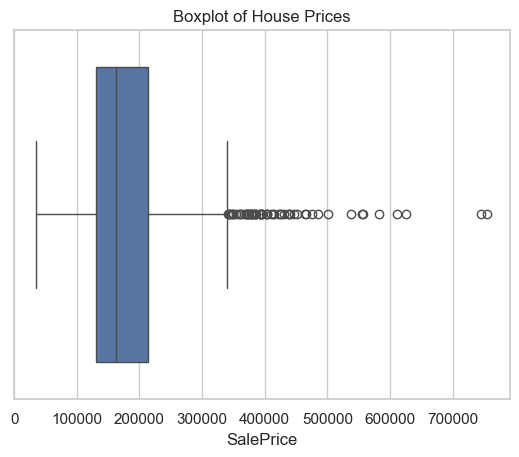

In [1277]:
# Visualize outliers
print(df.columns.tolist())
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot of House Prices')
plt.show()

# Remove outliers using IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['SalePrice'] >= Q1 - 1.5 * IQR) & (df['SalePrice'] <= Q3 + 1.5 * IQR)]






## Univariate Analysis (Categorical)

We analyze the distribution of a categorical feature using a bar plot. This helps us understand the frequency of each category in the dataset.


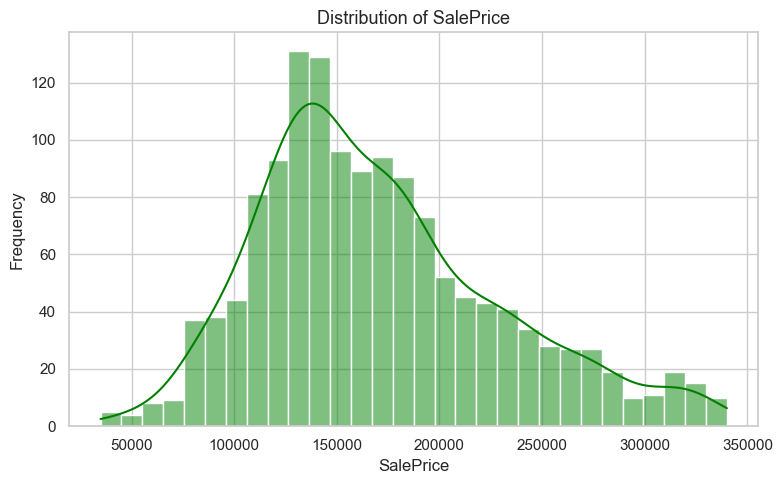

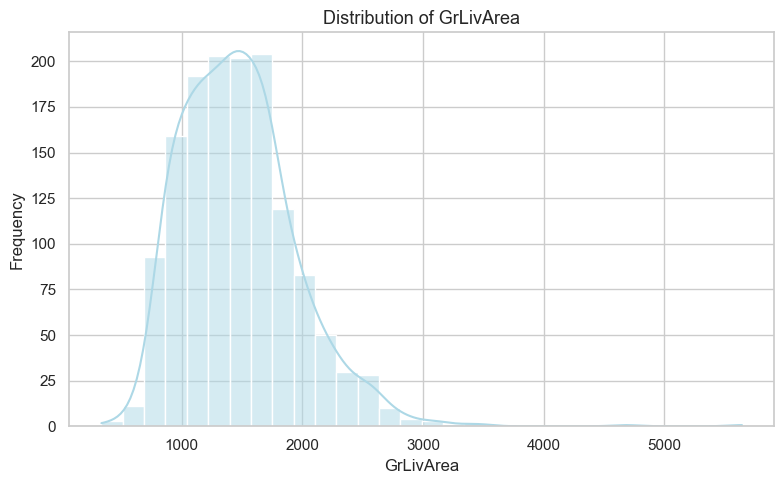

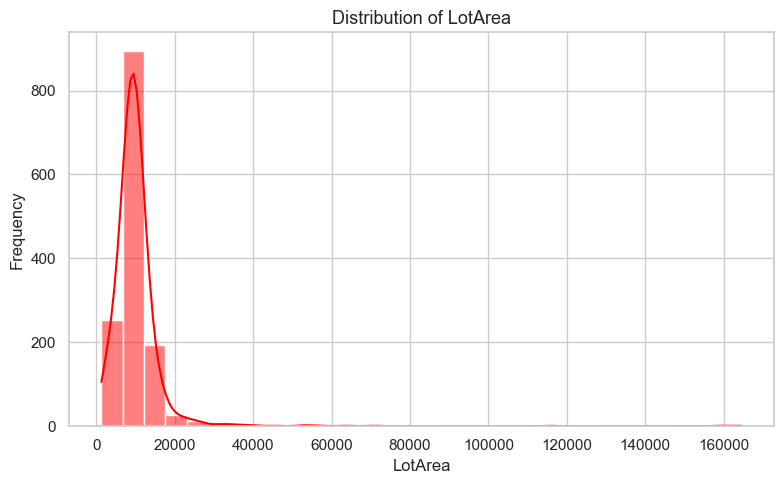

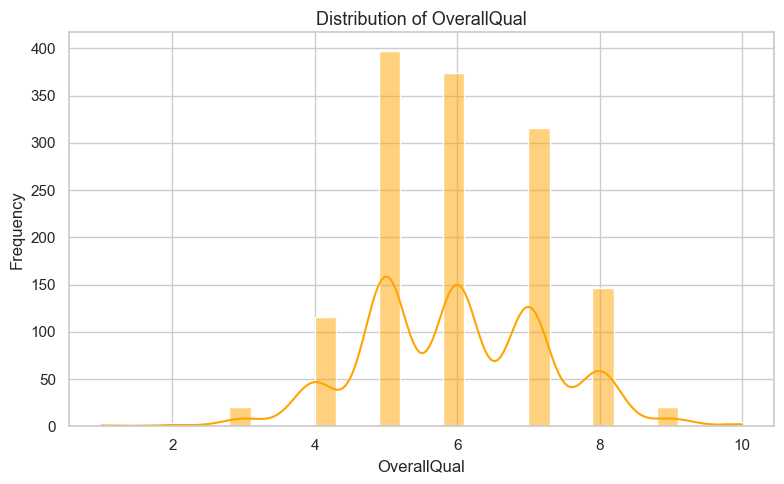

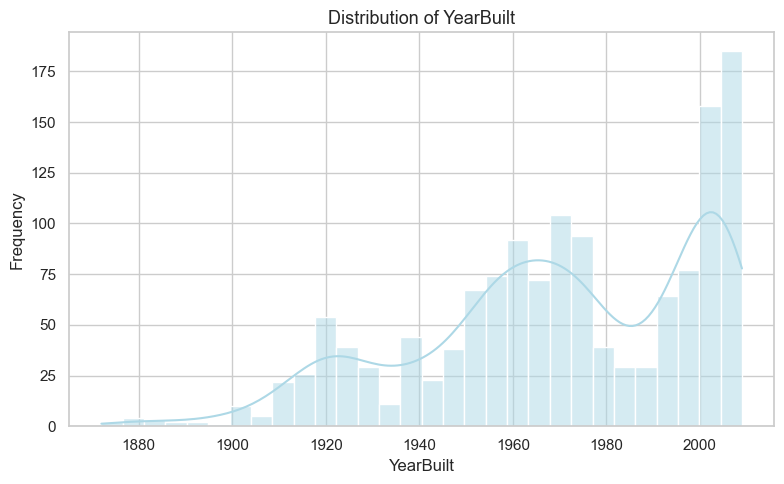

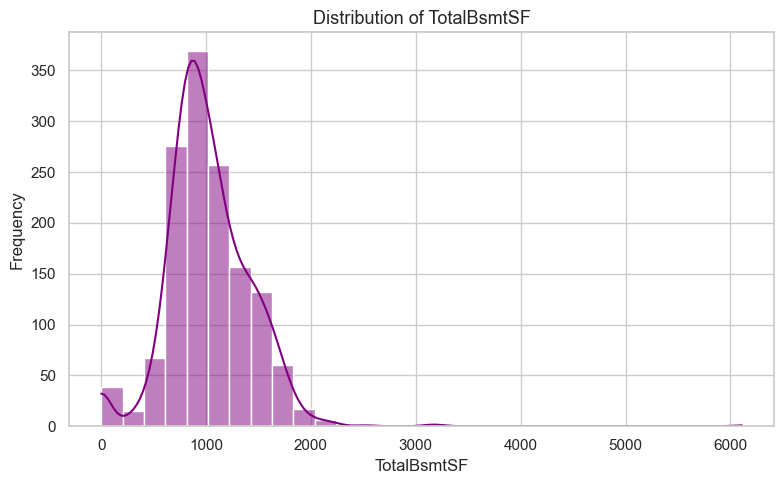

In [1278]:
sns.set(style='whitegrid')

# === Selecting top numeric features ===
selected_features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']

color_palette = ['green', 'lightblue', 'red', 'orange', 'lightblue', 'purple']

assert len(selected_features) <= len(color_palette)

# === Plot each feature with a unique color ===
for col, color in zip(selected_features, color_palette):
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30, color=color)
    plt.title(f'Distribution of {col}', fontsize=13)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    
image_dir = ASSETS_UNI_IMG_PATH
os.makedirs(image_dir, exist_ok=True)

# === Load dataset ===
df = pd.read_excel(output_file, sheet_name='Housing Data')

# === Select numeric features ===
selected_features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']
color_palette = ['green', 'blue', 'red', 'orange', 'lightblue', 'purple']

# === Selected features and colors ===
selected_features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']
color_palette = ['green', 'blue', 'red', 'orange', 'lightblue', 'purple']

# === Step 1: Load workbook and clean sheet ===
wb = load_workbook(output_file)

if 'Univariate Analysis' in wb.sheetnames:
    wb.remove(wb['Univariate Analysis'])

ws = wb.create_sheet('Univariate Analysis')

# === Step 2: Load data ===
df = pd.read_excel(output_file, sheet_name='Housing Data')

# === Step 3: Compute summary statistics ===
summary = []
for col in selected_features:
    stats = {
        'Feature': col,
        'Mean': round(df[col].mean(), 2),
        'Median': round(df[col].median(), 2),
        'Std Dev': round(df[col].std(), 2),
        'Skewness': round(df[col].skew(), 2),
        'Kurtosis': round(df[col].kurtosis(), 2)
    }
    summary.append(stats)

summary_df = pd.DataFrame(summary)

# === Step 4: Write summary table to sheet ===
for col_idx, col_name in enumerate(summary_df.columns, start=1):
    ws.cell(row=1, column=col_idx, value=col_name)

for row_idx, row in enumerate(summary_df.values, start=2):
    for col_idx, value in enumerate(row, start=1):
        ws.cell(row=row_idx, column=col_idx, value=value)

# === Step 5: Generate and save plots ===
image_paths = []
for col, color in zip(selected_features, color_palette):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color=color)
    plt.title(f'Distribution of {col}', fontsize=11)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    img_path = os.path.join(image_dir, f'{col}_dist.png')
    plt.savefig(img_path, dpi=120)
    plt.close()
    image_paths.append(img_path)

# === Step 6: Embed plots below the table ===
start_row = len(summary_df) + 2
    
# === Style header row ===
header_font = Font(bold=True, color='FFFFFF')
header_fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
header_align = Alignment(horizontal='center', vertical='center')

for cell in ws[1]:
    cell.font = header_font
    cell.fill = header_fill
    cell.alignment = header_align

# === Center-align all summary cells ===
for row in ws.iter_rows(min_row=2, max_row=len(summary_df)+1, min_col=1, max_col=6):
    for cell in row:
        cell.alignment = Alignment(horizontal='center', vertical='center')

# === Embed plots with reduced spacing ===
start_row = len(summary_df) + 4

for img_path in image_paths:
    img = XLImage(img_path)
    img.width = img.width * 0.6
    img.height = img.height * 0.6
    ws.add_image(img, f'B{start_row}')
    start_row += 15  # Reduced gap between plots

# === Save workbook ===
wb.save(output_file)

# === Step 7: Save workbook ===
wb.save(output_file)

#### Continous Feature: SalePrice

Available categorical columns: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


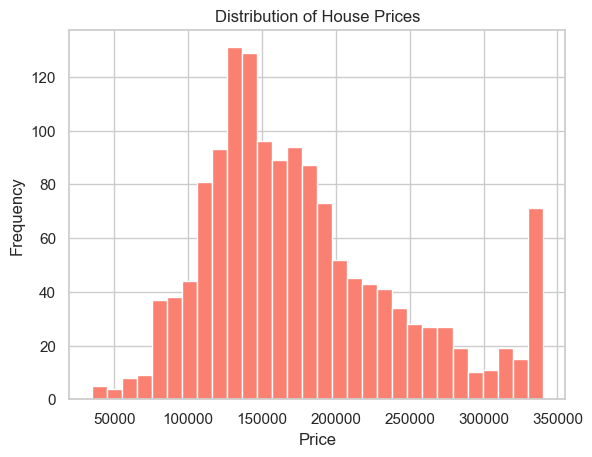

In [1279]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Available categorical columns:", categorical_cols)

# Continuous Feature: SalePrice
df['SalePrice'].plot(kind='hist', bins=30, color='salmon')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Bivariate Analysis
Examines the relationship between two variables to identify patterns, trends, and potential dependencies. Common techniques include scatterplots, boxplots, and grouped bar charts.
We will use the variable pairs to do the bivariate analysis. These pairs are as follows:
01. `SalePrice` - `GrLivArea`
02. `SalePrice` - `OverallQual`
03. `SalePrice` - `YearBuilt`
04. `SalePrice` - `TotalBsmtSF`
05. `SalePrice` - `LotArea`


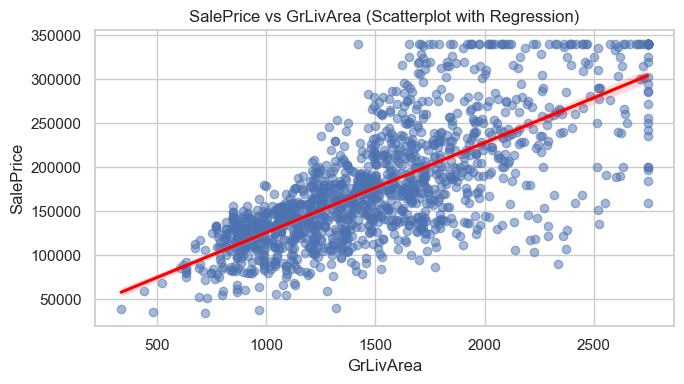

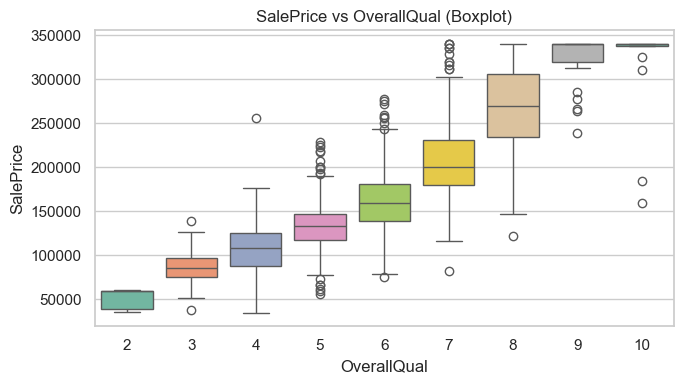

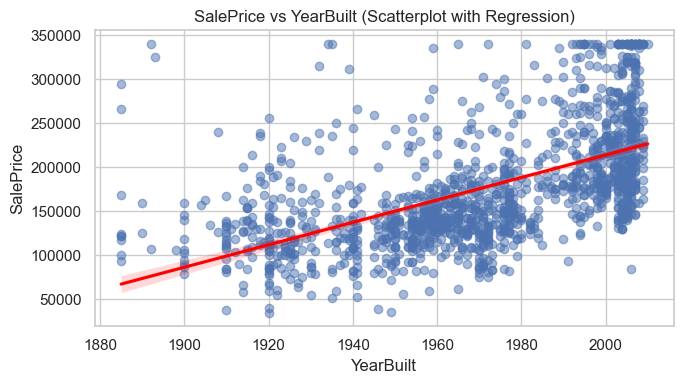

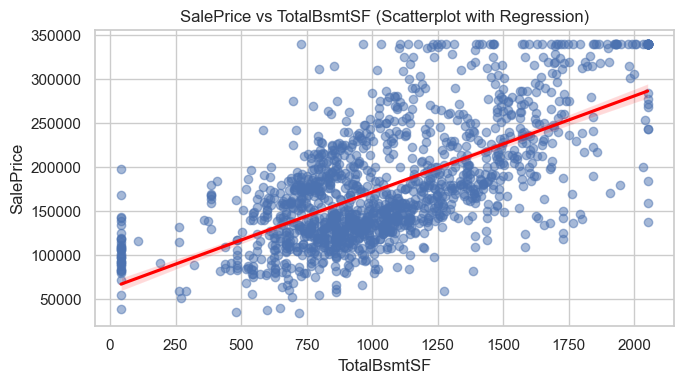

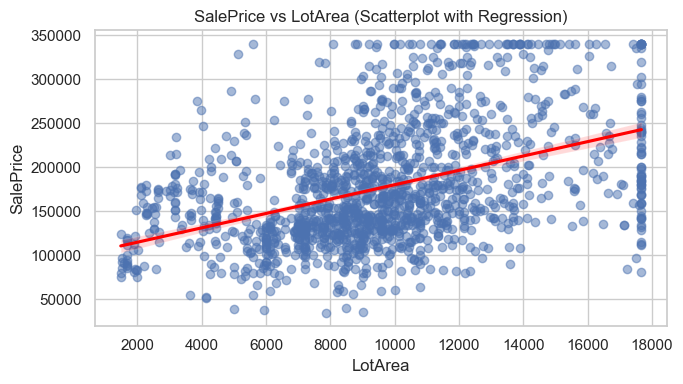

In [1280]:
bi_var_dir = ASSETS_BI_IMG_PATH
os.makedirs(bi_var_dir, exist_ok=True)
# === Load dataset ===
df = pd.read_excel(output_file, sheet_name='Housing Data')

# === Variable pairs for bivariate analysis ===
pairs = [
    ('SalePrice', 'GrLivArea'),
    ('SalePrice', 'OverallQual'),
    ('SalePrice', 'YearBuilt'),
    ('SalePrice', 'TotalBsmtSF'),
    ('SalePrice', 'LotArea')
]

# === Step 1: Load workbook and preserve all sheets ===
wb = load_workbook(output_file)
sheetnames = wb.sheetnames

# Remove only 'Bivariate Analysis' if it exists
if 'Bivariate Analysis' in sheetnames:
    bivar_sheet = wb['Bivariate Analysis']
    wb.remove(bivar_sheet)

# Create new sheet
ws = wb.create_sheet('Bivariate Analysis')

# === Step 2: Insert Markdown Header ===
ws['B2'] = ('Bivariate Analysis: Examines the relationship between two variables to identify patterns, '
            'trends, and potential dependencies. Common techniques include scatterplots, boxplots, '
            'and grouped bar charts.')
ws.merge_cells('B2:H2')
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center', vertical='center')

# === Step 3: Generate and show plots ===
image_paths = []
for x, y in pairs:
    plt.figure(figsize=(7, 4))
    if y == 'OverallQual':
        sns.boxplot(x=df[y], y=df[x], hue=df[y], palette='Set2', legend=False)
        plt.title(f'{x} vs {y} (Boxplot)', fontsize=12)
    else:
        sns.regplot(x=df[y], y=df[x], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
        plt.title(f'{x} vs {y} (Scatterplot with Regression)', fontsize=12)
    plt.xlabel(y)
    plt.ylabel(x)
    plt.tight_layout()
    img_path = os.path.join(bi_var_dir, f'{x}_vs_{y}.png')
    plt.savefig(img_path, dpi=120)
    plt.show()
    image_paths.append(img_path)
    plt.close()

# === Step 4: Embed plots into Excel with spacing ===
start_row = 4
for img_path in image_paths:
    img = XLImage(img_path)
    img.width *= 0.6
    img.height *= 0.6
    ws.add_image(img, f'B{start_row}')
    start_row += int(img.height / 20) + 3  # Add 2–3 row gap

# === Step 5: Save workbook ===
wb.save(output_file)

## Multivariate Analysis

We use:
- Pair plots to visualize interactions among multiple numerical features.
- Heatmaps to detect strong correlations (e.g., `Area_sqft` and `Price`).


Correlation Matrix:
               UnitId  LotFrontage  LotArea  OverallQual  OverallCond  \
UnitId           1.00        -0.03    -0.01        -0.03         0.01   
LotFrontage     -0.03         1.00     0.24         0.17        -0.06   
LotArea         -0.01         0.24     1.00         0.22        -0.03   
OverallQual     -0.03         0.17     0.22         1.00        -0.14   
OverallCond      0.01        -0.06    -0.03        -0.14         1.00   
YearBuilt       -0.01         0.03     0.07         0.58        -0.42   
YearRemodAdd    -0.02         0.07     0.05         0.55         0.04   
MasVnrArea      -0.04         0.08     0.14         0.41        -0.16   
BsmtFinSF1      -0.01         0.02     0.22         0.23        -0.05   
BsmtFinSF2        NaN          NaN      NaN          NaN          NaN   
BsmtUnfSF       -0.01         0.17     0.09         0.30        -0.15   
TotalBsmtSF     -0.02         0.20     0.36         0.54        -0.20   
1stFlrSF         0.01         0

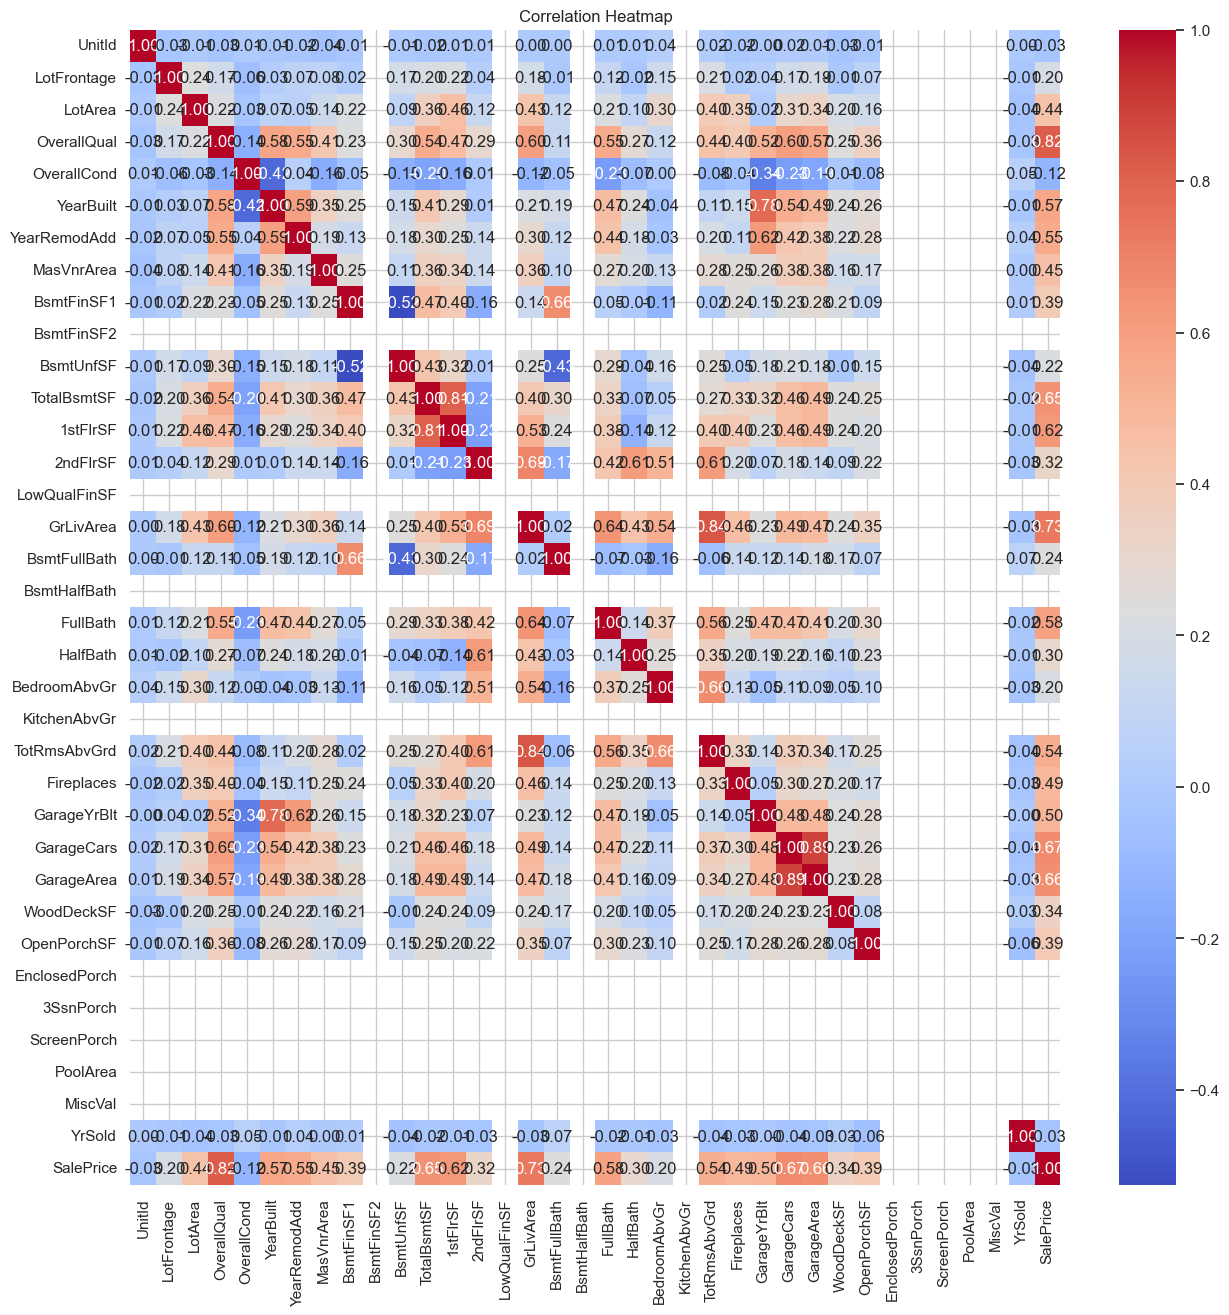

<Figure size 2500x2000 with 0 Axes>

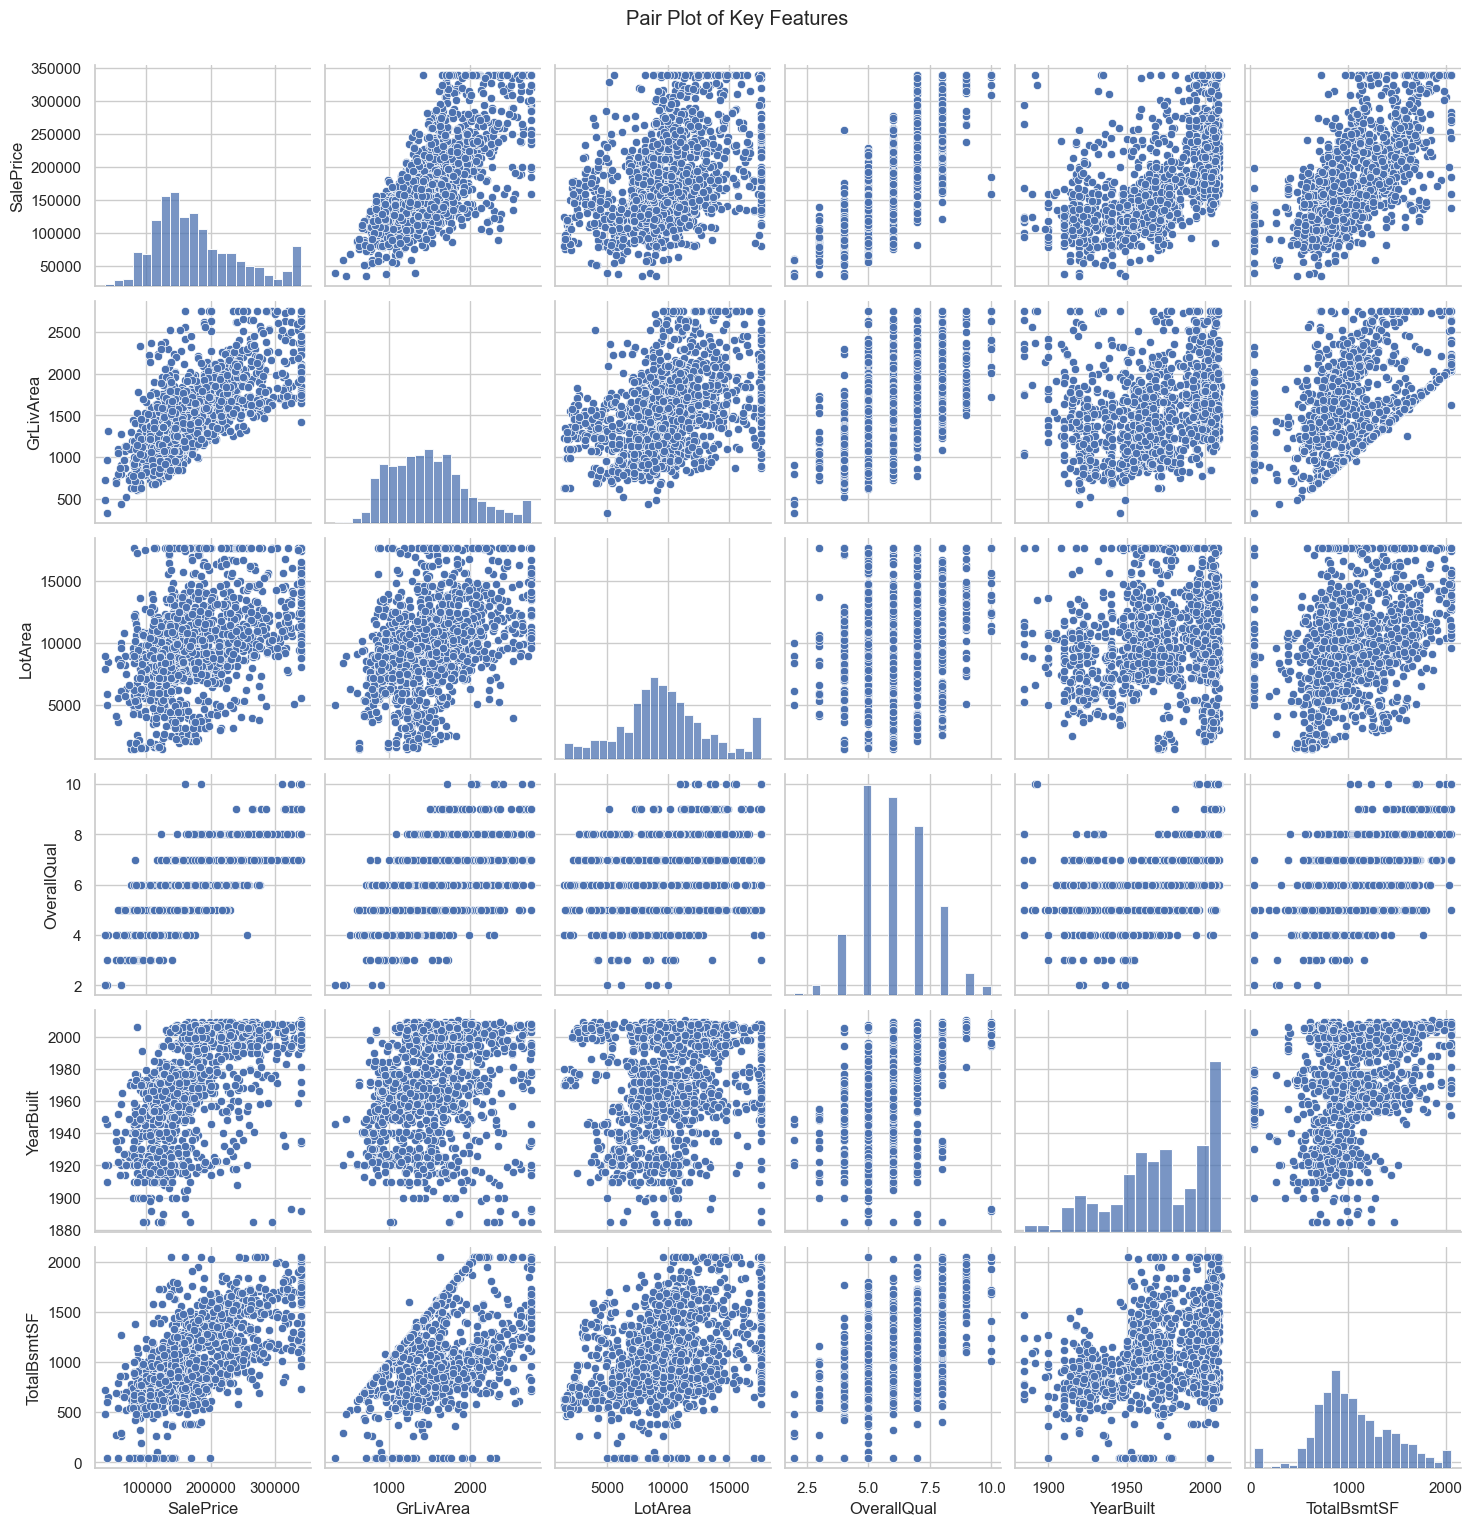

In [ ]:
# Correlation heatmap
# Select only numeric columns
# === Load dataset ===
multi_var_dir = ASSETS_MUL_IMG_PATH
os.makedirs(multi_var_dir, exist_ok=True)
df = pd.read_excel(output_file, sheet_name='Housing Data')
numeric_df = df.select_dtypes(include='number')
selected_features = ['SalePrice', 'GrLivArea', 'LotArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']

# === Step 1: Display correlation matrix in notebook ===
print("Correlation Matrix:")
print(numeric_df.corr().round(2))

# === Step 2: Plot and show heatmap ===
plt.figure(figsize=(25, 20))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
heatmap_path = os.path.join(multi_var_dir, HEATMAP_IMG)
plt.savefig(heatmap_path, dpi=120)
plt.show()

# === Step 3: Plot and show pairplot ===
# pairplot = sns.pairplot(df[selected_features], corner=True, plot_kws={'alpha': 0.6})
plt.figure(figsize=(25, 20))
pairplot = sns.pairplot(df[selected_features])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

scatterplot_path = os.path.join(multi_var_dir, PAIR_PLOT_IMG)
pairplot.savefig(scatterplot_path, dpi=120)
plt.show()

# === Step 4: Clean/Create 'Multivariate Analysis' sheet ===
wb = load_workbook(output_file)
if 'Multivariate Analysis' in wb.sheetnames:
    wb.remove(wb['Multivariate Analysis'])
ws = wb.create_sheet('Multivariate Analysis')

# === Step 5: Write correlation matrix to Excel ===
corr_matrix = numeric_df.corr().round(2)
ws['B2'] = 'Multivariate Analysis Report'
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center')

# Header row
for col_idx, col_name in enumerate(corr_matrix.columns, start=2):
    cell = ws.cell(row=3, column=col_idx, value=col_name)
    cell.font = Font(bold=True, color='FFFFFF')
    cell.fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
    cell.alignment = Alignment(horizontal='center')

# Data rows
for row_idx, row_name in enumerate(corr_matrix.index, start=4):
    ws.cell(row=row_idx, column=1, value=row_name).alignment = Alignment(horizontal='center')
    for col_idx, value in enumerate(corr_matrix.iloc[row_idx - 4], start=2):
        ws.cell(row=row_idx, column=col_idx, value=value).alignment = Alignment(horizontal='center')

start_row = len(corr_matrix) + 3  # Start after the correlation table

for img_path in [heatmap_path, scatterplot_path]:
    img = XLImage(img_path)
    img.width *= 0.6
    img.height *= 0.6
    ws.add_image(img, f'B{start_row}')
    start_row += int(img.height / 20) + 3  # Add 2–3 row gap

# === Save workbook ===
wb.save(output_file)

### Feature Engineering
Introduces new variables that might enhance the model's ability to predict house prices. For instance, calculate the price per square foot or engineer a feature representing the property's age.
We will get the following things:
01. `Price per square feet`
02. `Property Age`
03. `SalePrice Vs TotalLivingArea`

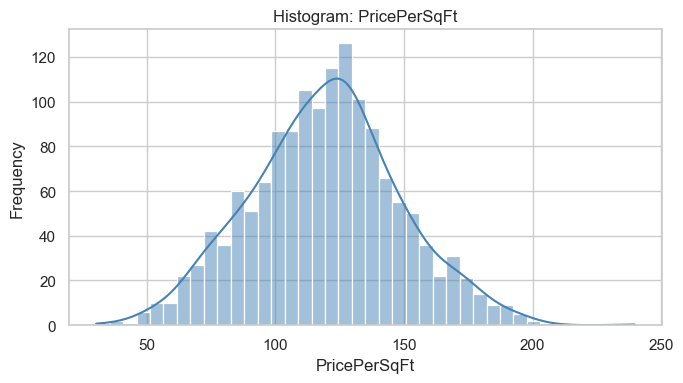

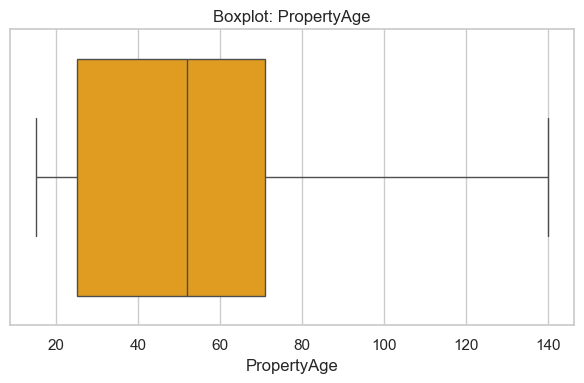

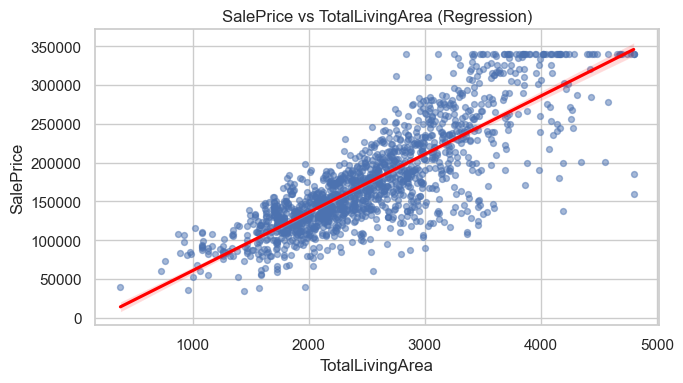

Feature Engineering complete. Images saved to: ../assets/images/feature_engineering
Excel updated with sheet: 'Feature Engineering' without altering other sheets.


In [1290]:
# === Configuration ===
sheet_name = 'Housing Data'
fe_sheet_name = 'Feature Engineering'
CURRENT_YEAR = 2025
os.makedirs(ASSETS_FE_IMG_PATH, exist_ok=True)

# === Load dataset ===
required_cols = ['SalePrice', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF']
df = pd.read_excel(output_file, sheet_name=sheet_name)

missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns in '{sheet_name}': {missing}")

# === Engineer new features ===
# 1) Price per square foot, guard against division-by-zero or NaN
den = df['GrLivArea'].replace(0, np.nan)
df['PricePerSqFt'] = df['SalePrice'] / den
df['PricePerSqFt'] = df['PricePerSqFt'].replace([np.inf, -np.inf], np.nan)

# 2) Property age, clamp to >= 0 and handle NaNs
df['PropertyAge'] = (CURRENT_YEAR - df['YearBuilt']).clip(lower=0)

# 3) Total living area: above grade + basement
df['TotalLivingArea'] = df['GrLivArea'].fillna(0) + df['TotalBsmtSF'].fillna(0)

# === Summary statistics for engineered features ===
features = ['PricePerSqFt', 'PropertyAge', 'TotalLivingArea']
summary_df = pd.DataFrame({
    'Feature': features,
    'Mean': [round(df[f].mean(skipna=True), 2) for f in features],
    'Median': [round(df[f].median(skipna=True), 2) for f in features],
    'Std Dev': [round(df[f].std(skipna=True), 2) for f in features],
    'Non-Null Count': [int(df[f].notna().sum()) for f in features]
})

# === Plots: show in notebook and save images ===
# 1) Histogram: PricePerSqFt
plt.figure(figsize=(7, 4))
sns.histplot(df['PricePerSqFt'], bins=40, kde=True, color='steelblue')
plt.title('Histogram: PricePerSqFt', fontsize=12)
plt.xlabel('PricePerSqFt')
plt.ylabel('Frequency')
price_sqft_path = os.path.join(ASSETS_FE_IMG_PATH, 'hist_price_per_sqft.png')
plt.tight_layout()
plt.savefig(price_sqft_path, dpi=130)
plt.show()
plt.close()

# 2) Boxplot: PropertyAge (single-variable boxplot)
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['PropertyAge'], color='orange')
plt.title('Boxplot: PropertyAge', fontsize=12)
plt.xlabel('PropertyAge')
prop_age_path = os.path.join(ASSETS_FE_IMG_PATH, 'box_property_age.png')
plt.tight_layout()
plt.savefig(prop_age_path, dpi=130)
plt.show()
plt.close()

# 3) Scatter with regression: SalePrice vs TotalLivingArea
plt.figure(figsize=(7, 4))
sns.regplot(x=df['TotalLivingArea'], y=df['SalePrice'],
            scatter_kws={'alpha': 0.5, 's': 18}, line_kws={'color': 'red'})
plt.title('SalePrice vs TotalLivingArea (Regression)', fontsize=12)
plt.xlabel('TotalLivingArea')
plt.ylabel('SalePrice')
sale_vs_tla_path = os.path.join(ASSETS_FE_IMG_PATH, 'scatter_saleprice_total_living_area.png')
plt.tight_layout()
plt.savefig(sale_vs_tla_path, dpi=130)
plt.show()
plt.close()

# === Write to Excel: create/update Feature Engineering sheet ===
wb = load_workbook(output_file)

# Remove only the Feature Engineering sheet if it exists; preserve others
if fe_sheet_name in wb.sheetnames:
    ws_old = wb[fe_sheet_name]
    wb.remove(ws_old)

ws = wb.create_sheet(fe_sheet_name)

# --- Markdown-style header at top ---
header_text = ("Feature Engineering: Introduces new variables that might enhance the model's ability "
               "to predict house prices. For instance, calculate the price per square foot or engineer "
               "a feature representing the property's age.")
ws['B2'] = header_text
ws.merge_cells('B2:H3')
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center', vertical='center')

# --- Summary table ---
start_row_table = 5
headers = list(summary_df.columns)

# Write headers
for col_idx, col_name in enumerate(headers, start=2):
    c = ws.cell(row=start_row_table, column=col_idx, value=col_name)
    c.font = Font(bold=True, color='FFFFFF')
    c.fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
    c.alignment = Alignment(horizontal='center', vertical='center')

# Write rows
for r_i, row in enumerate(summary_df.itertuples(index=False), start=start_row_table + 1):
    for c_i, val in enumerate(row, start=2):
        cell = ws.cell(row=r_i, column=c_i, value=val)
        cell.alignment = Alignment(horizontal='center', vertical='center')

# Optional: auto-width for the table columns
for i in range(2, 2 + len(headers)):
    col_letter = get_column_letter(i)
    ws.column_dimensions[col_letter].width = 18

# --- Embed images with clean spacing (vertical stacking, 2–3 row gap) ---
image_paths = [price_sqft_path, prop_age_path, sale_vs_tla_path]
start_row_images = start_row_table + len(summary_df) + 3  # below table

for img_path in image_paths:
    img = XLImage(img_path)
    # Scale down if required (tweak to your sheet layout)
    img.width = int(img.width * 0.6)
    img.height = int(img.height * 0.6)
    ws.add_image(img, f'B{start_row_images}')
    # Add ~2–3 row gap after each image; adjust based on height
    start_row_images += int(img.height / 18) + 3

# === Save workbook ===
wb.save(output_file)

print(f"Feature Engineering complete. Images saved to: {ASSETS_FE_IMG_PATH}")
print(f"Excel updated with sheet: '{fe_sheet_name}' without altering other sheets.")

## Market Trends and Historical Pricing
We will nalyze the dataset temporally, looking at trends in house prices over different periods. We will also understand how external factors, such as economic indicators, may have influenced these trends. 

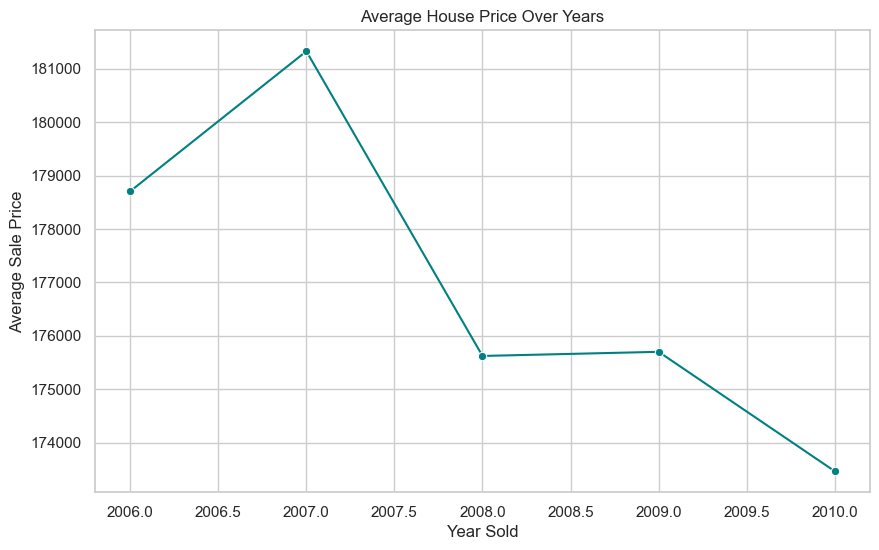

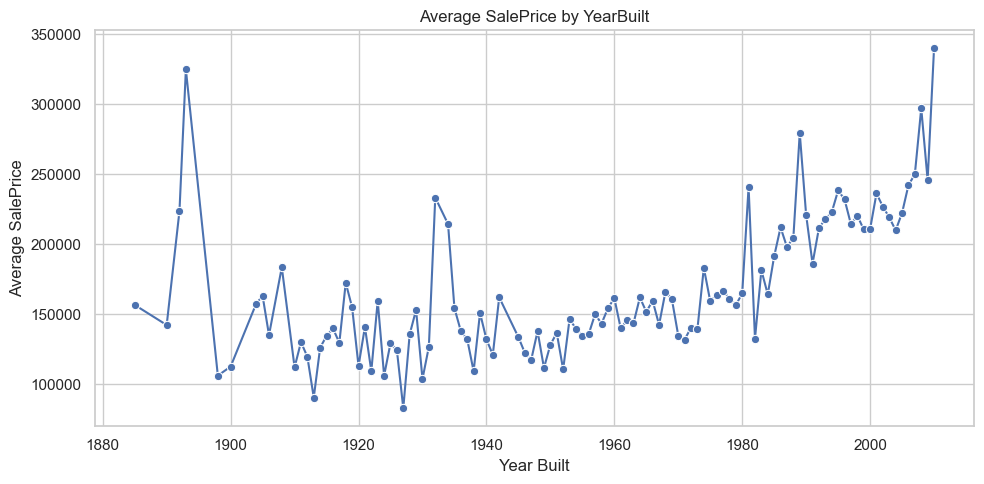

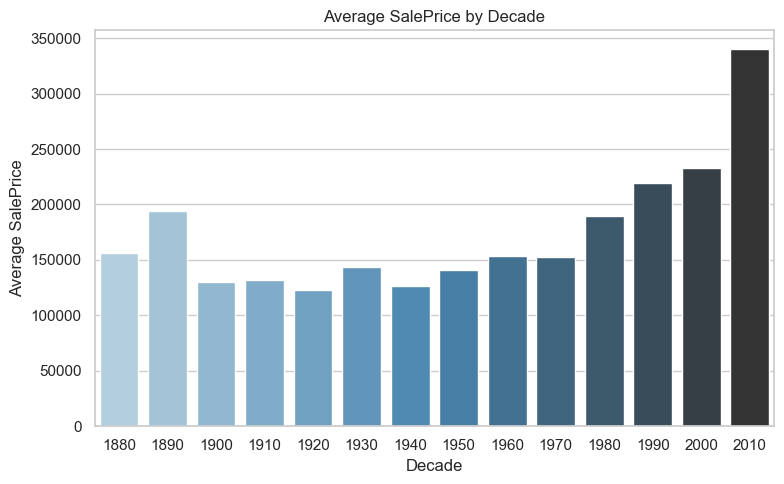

Market Trends and Historical Pricing analysis complete. Images saved to: ../assets/images/market_trends
../data/housing_data.xlsx updated with sheet: 'Market Trends'


In [1291]:
os.makedirs(MT_IMG_DIR, exist_ok=True)

sheet_name = 'Housing Data'
new_sheet_name = "Market Trends"

# === Load dataset ===
df = pd.read_excel(output_file, sheet_name=sheet_name)

# Ensure required columns exist
if 'SalePrice' not in df.columns or 'YearBuilt' not in df.columns:
    raise ValueError("Dataset must contain 'SalePrice' and 'YearBuilt' columns.")

# === Step 1: Temporal aggregations ===

# Average SalePrice by YearBuilt
yearly_trend = df.groupby('YearBuilt')['SalePrice'].mean().reset_index()
price_by_year = df.groupby('YrSold')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='YrSold', y='SalePrice', data=price_by_year, marker='o', color='teal')
plt.title('Average House Price Over Years')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

# Average SalePrice by Decade
df['Decade'] = (df['YearBuilt'] // 10) * 10
decade_trend = df.groupby('Decade')['SalePrice'].mean().reset_index()

# === Step 2: Plots (Notebook + Save) ===
# 1) Lineplot: Average SalePrice by YearBuilt
plt.figure(figsize=(10, 5))
sns.lineplot(x='YearBuilt', y='SalePrice', data=yearly_trend, marker='o')
plt.title('Average SalePrice by YearBuilt')
plt.xlabel('Year Built')
plt.ylabel('Average SalePrice')
plt.tight_layout()
yearly_path = os.path.join(MT_IMG_DIR, 'avg_price_by_year.png')
plt.savefig(yearly_path, dpi=130)
plt.show()
plt.close()

# 2) Barplot: Average SalePrice by Decade
plt.figure(figsize=(8, 5))
sns.barplot(x='Decade', y='SalePrice', data=decade_trend, hue='Decade', palette='Blues_d', legend=False)
plt.title('Average SalePrice by Decade')
plt.xlabel('Decade')
plt.ylabel('Average SalePrice')
plt.tight_layout()
decade_path = os.path.join(MT_IMG_DIR, 'avg_price_by_decade.png')
plt.savefig(decade_path, dpi=130)
plt.show()
plt.close()

# === Step 3: Write to Excel ===
wb = load_workbook(output_file)

# Remove only this sheet if it exists
if new_sheet_name in wb.sheetnames:
    ws_old = wb[new_sheet_name]
    wb.remove(ws_old)

ws = wb.create_sheet(new_sheet_name)

# --- Markdown-style header ---
header_text = ("Market Trends and Historical Pricing: Analyze the dataset temporally, "
               "looking at trends in house prices over different periods. Understand how "
               "external factors, such as economic indicators, may have influenced these trends.")
ws['B2'] = header_text
ws.merge_cells('B2:H3')
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center', vertical='center')

# --- Insert summary tables ---
# Yearly trend table
start_row = 5
ws.cell(row=start_row, column=2, value='YearBuilt')
ws.cell(row=start_row, column=3, value='Avg SalePrice')
ws.cell(row=start_row, column=2).font = Font(bold=True, color='FFFFFF')
ws.cell(row=start_row, column=3).font = Font(bold=True, color='FFFFFF')
ws.cell(row=start_row, column=2).fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws.cell(row=start_row, column=3).fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')

for i, row in enumerate(yearly_trend.itertuples(index=False), start=start_row+1):
    ws.cell(row=i, column=2, value=row.YearBuilt)
    ws.cell(row=i, column=3, value=round(row.SalePrice, 2))

# Decade trend table
start_row = start_row + len(yearly_trend) + 3
ws.cell(row=start_row, column=2, value='Decade')
ws.cell(row=start_row, column=3, value='Avg SalePrice')
ws.cell(row=start_row, column=2).font = Font(bold=True, color='FFFFFF')
ws.cell(row=start_row, column=3).font = Font(bold=True, color='FFFFFF')
ws.cell(row=start_row, column=2).fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws.cell(row=start_row, column=3).fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')

for i, row in enumerate(decade_trend.itertuples(index=False), start=start_row+1):
    ws.cell(row=i, column=2, value=row.Decade)
    ws.cell(row=i, column=3, value=round(row.SalePrice, 2))

# --- Embed plots with spacing ---
img_paths = [yearly_path, decade_path]
start_row_img = start_row + len(decade_trend) + 4

for img_path in img_paths:
    img = XLImage(img_path)
    img.width = int(img.width * 0.6)
    img.height = int(img.height * 0.6)
    ws.add_image(img, f'B{start_row_img}')
    start_row_img += int(img.height / 20) + 3

# === Save workbook ===
wb.save(output_file)

print(f"Market Trends and Historical Pricing analysis complete. Images saved to: {MT_IMG_DIR}")
print(f"{XLSX_PATH} updated with sheet: '{new_sheet_name}'")

## Customer Preferences and Amenities Analysis
We’ll examine the dataset to see how the presence or absence of certain amenities affects average house prices. This will be visualized with boxplots and barplots. If customer feedback/reviews were available, we’d integrate sentiment analysis, but since the Ames Housing dataset (or similar) doesn’t include reviews, we’ll focus on structural amenities.

### Amenities to Analyze
`PoolArea (Swimming pool size; >0 means pool present)`

`GarageCars (Number of garage spaces)`

`Fireplaces (Number of fireplaces)`

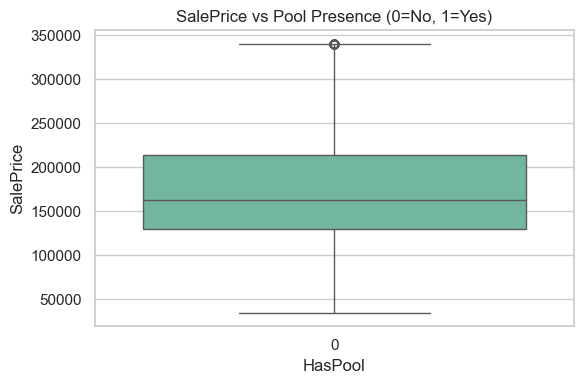

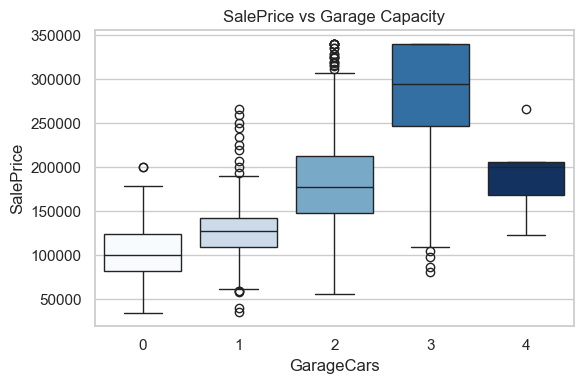

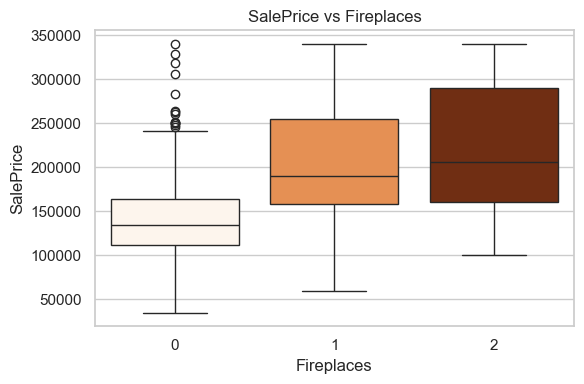

Customer Preferences and Amenities analysis complete. Images saved to: ../assets/images/customer_prefs
Excel updated with sheet: 'Customer Preferences' without altering other sheets.


In [1292]:
# === Setup ===
cp_img_dir = CP_IMG_DIR
os.makedirs(cp_img_dir, exist_ok=True)

sheet_name = 'Housing Data'
new_sheet_name = 'Customer Preferences'

# === Load dataset ===
df = pd.read_excel(output_file, sheet_name=sheet_name)

# === Engineer amenity flags ===
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
df['HasGarage'] = df['GarageCars'].apply(lambda x: 1 if x > 0 else 0)
df['HasFireplace'] = df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# === Summary statistics ===
summary = {
    'Amenity': ['Pool', 'Garage', 'Fireplace'],
    'AvgPrice_With': [
        df.loc[df['HasPool']==1, 'SalePrice'].mean(),
        df.loc[df['HasGarage']==1, 'SalePrice'].mean(),
        df.loc[df['HasFireplace']==1, 'SalePrice'].mean()
    ],
    'AvgPrice_Without': [
        df.loc[df['HasPool']==0, 'SalePrice'].mean(),
        df.loc[df['HasGarage']==0, 'SalePrice'].mean(),
        df.loc[df['HasFireplace']==0, 'SalePrice'].mean()
    ]
}
summary_df = pd.DataFrame(summary).round(2)

# === Plots (Notebook + Save) ===
image_paths = []

# 1) Pool vs SalePrice
plt.figure(figsize=(6,4))
sns.boxplot(x='HasPool', y='SalePrice', data=df, hue='HasPool', palette='Set2', legend=False)
plt.title('SalePrice vs Pool Presence (0=No, 1=Yes)')
pool_path = os.path.join(cp_img_dir, 'pool_vs_price.png')
plt.tight_layout(); plt.savefig(pool_path, dpi=130); plt.show(); plt.close()
image_paths.append(pool_path)

# 2) GarageCars vs SalePrice
plt.figure(figsize=(6,4))
sns.boxplot(x='GarageCars', y='SalePrice', data=df, hue='GarageCars', palette='Blues', legend=False)
plt.title('SalePrice vs Garage Capacity')
garage_path = os.path.join(cp_img_dir, 'garage_vs_price.png')
plt.tight_layout(); plt.savefig(garage_path, dpi=130); plt.show(); plt.close()
image_paths.append(garage_path)

# 3) Fireplaces vs SalePrice
plt.figure(figsize=(6,4))
sns.boxplot(x='Fireplaces', y='SalePrice', data=df, hue='Fireplaces', palette='Oranges', legend=False)
plt.title('SalePrice vs Fireplaces')
fireplace_path = os.path.join(cp_img_dir, 'fireplace_vs_price.png')
plt.tight_layout(); plt.savefig(fireplace_path, dpi=130); plt.show(); plt.close()
image_paths.append(fireplace_path)

# === Write to Excel ===
wb = load_workbook(output_file)

# Remove only this sheet if it exists
if new_sheet_name in wb.sheetnames:
    ws_old = wb[new_sheet_name]
    wb.remove(ws_old)

ws = wb.create_sheet(new_sheet_name)

# --- Markdown-style header ---
header_text = ("Customer Preferences and Amenities: Investigates how customer preferences "
               "and amenities impact house prices. Examines features such as swimming pools, "
               "garages, and fireplaces to understand their contribution to property value.")
ws['B2'] = header_text
ws.merge_cells('B2:H3')
ws['B2'].font = Font(bold=True, color='FFFFFF')
ws['B2'].fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
ws['B2'].alignment = Alignment(horizontal='center', vertical='center')

# --- Insert summary table ---
start_row = 5
for col_idx, col_name in enumerate(summary_df.columns, start=2):
    c = ws.cell(row=start_row, column=col_idx, value=col_name)
    c.font = Font(bold=True, color='FFFFFF')
    c.fill = PatternFill(start_color='4BACC6', end_color='4BACC6', fill_type='solid')
    c.alignment = Alignment(horizontal='center', vertical='center')

for r_i, row in enumerate(summary_df.itertuples(index=False), start=start_row+1):
    for c_i, val in enumerate(row, start=2):
        ws.cell(row=r_i, column=c_i, value=val)

# --- Embed plots with spacing ---
start_row_img = start_row + len(summary_df) + 3
for img_path in image_paths:
    img = XLImage(img_path)
    img.width = int(img.width * 0.6)
    img.height = int(img.height * 0.6)
    ws.add_image(img, f'B{start_row_img}')
    start_row_img += int(img.height / 20) + 3

# === Save workbook ===
wb.save(output_file)

print(f"Customer Preferences and Amenities analysis complete. Images saved to: {cp_img_dir}")
print(f"Excel updated with sheet: '{new_sheet_name}' without altering other sheets.")